<a href="https://colab.research.google.com/github/anamariasosam/face_recognition/blob/master/Proyecto_de_Aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<a href="http://www.udem.edu.co/"><img src="https://www.universidadesvirtuales.com.co/logos/original/logo-universidad-de-medellin.png"></a>
<h1>Reconocimiento de Patrones I</h1>
<h3>2018-2</h3>
<h2>Proyecto de Aula: Caracterización de rostros</h2>
</center>

### Estudiantes

Nombre: Ana María Sosa 

Identificación: 1017235052
    
Nombre: Melisa Morales Gómez
    
Identificación: 1035875351

Nombre: Miguel Angel Mejia
    
Identificación: 1036646927


## Descripción del proyecto

Aquí se describe el problema que se quiere resolver, cómo se va a resolver y se describe la base de datos. Tenga en cuenta que en la descripción de la base de datos debe hablar de las imágenes originales y de la base de datos elaborada después de caracterizar las imágenes, es decir, cuántas y cuáles son las características que representan a cada muestra (imágen).

In [0]:
# esto lo podemos usar despues para recorrer 

import matplotlib.pyplot as plt
import os
import cv2
items = os.listdir('sample_data')

for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "sample_data/" + each_image
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

## Código fuente del proyecto

### Método OTSU

In [0]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage import io
import numpy as np
from PIL import Image


def otsu(urlRostro):
	image = cv2.imread(urlRostro)
	cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
	rostro = np.asarray(image,dtype=np.float32)


	thresh1 = threshold_otsu(rostro)
	rostroBinarizado = rostro > thresh1

	return rostroBinarizado

### Extracción de Carcterísticas

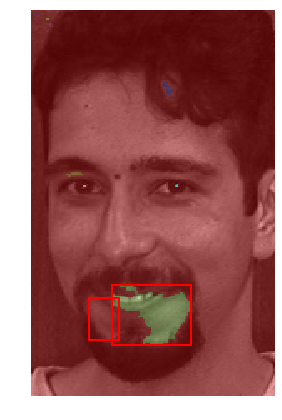

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


bw = closing(otsu("sample_data/s11_02.jpg"), square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

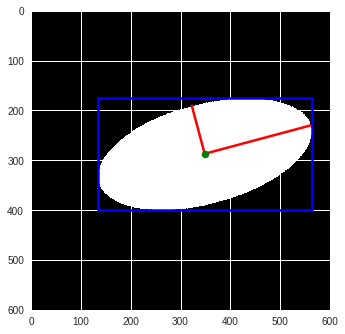

area 231
bbox (172, 34, 197, 52)
bbox_area 33726
centroid (183.64935064935065, 42.277056277056275)
convex_area 276
convex_image [[False  True  True  True False False False False False False False False
  False False False False False False]
 [False  True  True  True  True  True False False False False False False
  False False False False False False]
 [ True  True  True  True  True  True  True  True False False False False
  False False False False False False]
 [ True  True  True  True  True  True  True  True  True False False False
  False False False False False False]
 [ True  True  True  True  True  True  True  True  True  True False False
  False False False False False False]
 [ True  True  True  True  True  True  True  True  True  True  True  True
  False False False False False False]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True False False False False False]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True

In [37]:
import math
import matplotlib.pyplot as plt
import numpy as np

from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate


image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = rotate(image, angle=15, order=0)

label_img = label(image)
regions = regionprops(label_img)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.major_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.major_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 600, 600, 0))
plt.show()

for prop in region:
    print(prop, region[prop])